In [10]:
import numpy as np
import pandas as pd

# Python

## 1. FizzBuzz questions

In [7]:
for i in range(1,101):
    word = ''
    if i % 3 == 0:
        word += 'Fizz'
    if i % 5 == 0:
        word += 'Buzz'
    if word == '':
        word = str(i)
    print word

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


## 2. Fibonachi(100)

In [36]:
FIBONACHES = np.zeros(1001)
FIBONACHES[[1,2]] = 1
#FIBONACHES

In [37]:
# WARNING: does not work for x <= 0
def Fibonachi(x):
    if FIBONACHES[x] == 0:
        FIBONACHES[x] = Fibonachi(x-1) + Fibonachi(x-2)
    return FIBONACHES[x]    

In [38]:
Fibonachi(100)

3.54224848179262e+20

## 3. Quicksort

In [148]:
def qsort(a, l = 0, r = -100):
    if r == -100:
        r = len(a) - 1
    l_old = l
    r_old = r
    if r-l < 1:
        return a
    m = a[l]
    
    while l <= r:        
        while a[l] < m:
            l += 1
        while a[r] > m:
            r -= 1
        if l <= r:
            t = a[l]
            a[l] = a[r]
            a[r] = t
            l += 1
            r -= 1
            
    if l_old < r:
        a = qsort(a, l_old, r)
    if l < r_old:
        a = qsort(a, l, r_old)
    return a

In [152]:
qsort([2,5,4,1,-4,7,0,3,2,-6,-1])

[-6, -4, -1, 0, 1, 2, 2, 3, 4, 5, 7]

## 4. List Comprehension Quicksort

In [189]:
def lc_qsort(a):
    return (lambda y: y if len(y) <= 1 else lc_qsort(y))([x for x in a if x < a[0]]) + [x for x in a if x == a[0]] + (lambda y: y if len(y) <= 1 else lc_qsort(y))([x for x in a if x > a[0]])

In [190]:
lc_qsort([2,5,4,1,-4,7,0,3,2,-6,-1])

[-6, -4, -1, 0, 1, 2, 2, 3, 4, 5, 7]

# NumPy

In [191]:
import time

In [223]:
def linecpace_loop(first,last,count):
    a_loop = np.zeros(count)
    step = (last - first) * 1.0 / (count - 1)
    for i in range(count):
        a_loop[i] = first + step * i
    return a_loop

In [403]:
linspace_first = 1
linspace_last = 10000000
linspace_count = 10000000
linspace_step = (linspace_last - linspace_first) * 1.0 / (linspace_count - 1)

time_array = []
time_array += [time.time()]

a_linspace = np.linspace(linspace_first,linspace_last,linspace_count)
time_array += [time.time()]

a_loop = linecpace_loop(linspace_first,linspace_last,linspace_count)
time_array += [time.time()]

a_listcomprehension = [(linspace_first + linspace_step * x) for x in range(linspace_count)]
time_array += [time.time()]

time_linspace = time_array[1] - time_array[0]
time_loop = time_array[2] - time_array[1]
time_listcomprehension = time_array[3] - time_array[2]
#print a_linspace
#print a_loop
#print a_listcomprehension
print 'time_linspace =',time_linspace
print 'time_loop =',time_loop
print 'time_listcomprehension =',time_listcomprehension

time_linspace = 0.0929999351501
time_loop = 2.35700011253
time_listcomprehension = 2.46300005913


In [401]:
# Я не понял, что значит основные операции с массивами

# Matplotlib

In [291]:
import matplotlib.pyplot as plt
%matplotlib inline

In [405]:
x = np.arange(-4.,4.,0.1)
y1 = x**2
y2 = x**3
y3 = np.sin(x) * 50
y4 = np.abs(x)
y5 = np.exp(-y4) * 2

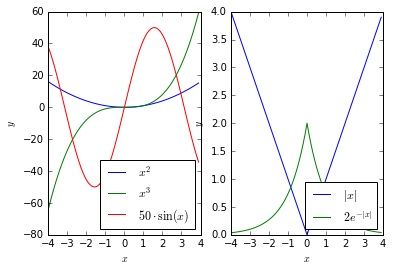

In [407]:
plt.figure(1)

plt.subplot(121)
plt.plot(x, y1, label=r'$x^2$')
plt.plot(x, y2, label=r'$x^3$')
plt.plot(x, y3, label=r'$50\cdot\sin (x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='outer lower right')

plt.subplot(122)
plt.plot(x, y4, label=r'$|x|$')
plt.plot(x, y5, label=r'$2e^{-|x|}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='lower right')

plt.savefig('plot_levdikpavel.png')
plt.show()

# SciPy

In [397]:
from scipy.stats import norm
from scipy.linalg import eig

## Create matrix M

In [398]:
M = norm.rvs(size=(5,5),loc=0,scale=1)
M_df = pd.DataFrame(M)
M_df

,0,1,2,3,4
0,1.603733,0.880906,0.115517,0.737911,0.568585
1,0.782991,-0.801667,0.676975,-0.387471,-0.121817
2,0.417577,0.731611,0.674984,0.991482,1.751300
3,-1.161776,0.246741,-0.180420,1.042183,-1.122288
4,-0.125030,-1.047846,1.075087,0.652539,-0.401034


## Find eigenvalues and eigenvectors

In [399]:
eigs = eig(M)
print eigs[0]
M_eigs_df = pd.DataFrame(eigs[1])
M_eigs_df

[-2.04928215+0.j          1.43722994+1.02101491j  1.43722994-1.02101491j
  1.12210873+0.j          0.17091219+0.j        ]


,0,1,2,3,4
0,(0.219640496684+0j),(-0.23705753861+0.227292772305j),(-0.23705753861-0.227292772305j),(-0.461334771796+0j),(0.123493174363+0j)
1,(-0.512886219101+0j),(-0.169202697091+0.259692289726j),(-0.169202697091-0.259692289726j),(0.0995344371205+0j),(-0.562793600423+0j)
2,(0.535645363687+0j),(-0.58942566011+0j),(-0.58942566011-0j),(0.75017015117+0j),(-0.687864418354+0j)
3,(-0.0738096316063+0j),(0.235763639223-0.530663966884j),(0.235763639223+0.530663966884j),(-0.240253270154+0j),(0.405697803791+0j)
4,(-0.629556956211+0j),(-0.262812010464-0.205889727841j),(-0.262812010464+0.205889727841j),(0.395962415681+0j),(0.173967333629+0j)


## Ensure eigs

In [400]:
pd.DataFrame(M.dot(eigs[1]) / eigs[0])

,0,1,2,3,4
0,(0.219640496684-0j),(-0.23705753861+0.227292772305j),(-0.23705753861-0.227292772305j),(-0.461334771796+0j),(0.123493174363+0j)
1,(-0.512886219101-0j),(-0.169202697091+0.259692289726j),(-0.169202697091-0.259692289726j),(0.0995344371205+0j),(-0.562793600423+0j)
2,(0.535645363687-0j),(-0.58942566011+3.08029680312e-16j),(-0.58942566011-3.08029680312e-16j),(0.75017015117+0j),(-0.687864418354+0j)
3,(-0.0738096316063-0j),(0.235763639223-0.530663966884j),(0.235763639223+0.530663966884j),(-0.240253270154+0j),(0.405697803791+0j)
4,(-0.629556956211-0j),(-0.262812010464-0.205889727841j),(-0.262812010464+0.205889727841j),(0.395962415681+0j),(0.173967333629+0j)
